In [1]:
import os
import torch
import numpy as np
from ASIF import zero_shot_classification
import editdistance
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_distances

In [2]:
def phonetic_distance(w1,w2,lexicon):
    #w1_phones, w2_phones = phonemize(w1, backend='segments'), phonemize(w2, backend='segments')
    w1_phones = lexicon[w1.upper()]
    w2_phones = lexicon[w2.upper()]
    return editdistance.eval(w1_phones, w2_phones)/max(len(w1_phones),len(w2_phones))

def semantic_distance(w1,w2,glove_embeddings):
    w1_emb = glove_embeddings[w1]
    w2_emb = glove_embeddings[w2]
    return cosine(w1_emb, w2_emb)

In [3]:
def unique_ordered(elements):
    seen = set()
    unique = []
    for element in elements:
        if element not in seen:
            unique.append(element)
            seen.add(element)
    return unique

In [4]:
with open('../results/experiment3_audio_vs_speech/retrieval_mel256-ec-base_layer7_bert-base-uncased_layer0_p4_k100.json', 'r') as f:
    words = json.load(f)

In [5]:
keys_test = [words['all_values'][i] for i in words['rows_deleted']]
keys_test

['some',
 'this',
 'of',
 'fire',
 'we',
 'never',
 'illustration',
 'was',
 'me',
 'excitement',
 'probably',
 'in',
 'cross',
 'and',
 'garden',
 'no',
 'pocket',
 'voice',
 'an',
 'keep',
 'recipe',
 'that',
 'river',
 'for',
 'during',
 'so',
 'their',
 'keep',
 'country',
 'turban',
 'like',
 'tore',
 'office',
 'in',
 'wielded',
 'spirit',
 'of',
 'drouet',
 'walked',
 'the',
 'we',
 'for',
 'necessity',
 'that',
 'panada',
 'into',
 'have',
 'had',
 'do',
 'that',
 'quarters',
 'heart',
 'beat',
 'face',
 'olden',
 'call',
 'some',
 'paid',
 'a',
 'call',
 'either',
 'venus',
 'for',
 'while',
 'found',
 'edition',
 'performance',
 'love',
 'not',
 'the',
 'these',
 'over',
 'things',
 'door',
 'several',
 'charwoman',
 'nor',
 'the',
 'among',
 'give',
 'got',
 'et',
 'happy',
 'whisper',
 'the',
 'food',
 'very',
 'beaten',
 'but',
 'the',
 'whom',
 'fields',
 'two',
 'are',
 'in',
 'darker',
 'how',
 'before',
 'his',
 'could',
 'were',
 'what',
 'not',
 'appointment',
 'with

In [6]:
glove_matrix = {}
with open('../../experiments/layers/embeddings_layer0_glove.json','r') as f:
    embeddings_glove = np.array(json.load(f))

for i in range(len(words['all_values'])):
    k = words['all_values'][i]
    glove_matrix[k] = embeddings_glove[i,:]

lexicon = {}
with open('librispeech-lexicon.txt','r') as f:
    lexicon_w = f.read().splitlines()
    for w in lexicon_w:
        parts = w.split()
        lexicon[parts[0]] = parts[1:]

# Obtenemos el retrieval de cada palabra 

In [2]:
# path_layer1 = '../../experiments/layers/embeddings_layer6_wav2vec2.json'
# path_layer2 = '../../experiments/layers/embeddings_layer0_bert-base-uncased.json' 

# with open(path_layer1, 'r') as f:
#     audio = np.array(json.load(f))

# with open(path_layer2, 'r') as f:
#     nlp = np.array(json.load(f))

# with open('../words_in_order1.json', 'r') as f:
#     keys = json.load(f)

# p=4
# k=100

# all_values = [value for values_list in keys.values() for value in values_list]
# n = audio.shape[0]
# np.random.seed(2211) 
# rows_to_delete = np.random.choice(n, int(n*0.15), replace=False) 
# deleted_rows = audio[rows_to_delete] 
# audio_new = np.delete(audio, rows_to_delete, axis=0)
# nlp_new = np.delete(nlp, rows_to_delete, axis=0)
# keys_new = np.delete(all_values, rows_to_delete)

# audio_new = torch.from_numpy(audio_new)
# nlp_new = torch.from_numpy(nlp_new)
# to_predict = torch.from_numpy(deleted_rows)

# total_anchors = len(audio_new) 
# range_anch = range(total_anchors, total_anchors + 1)

# n_anchors, sims = zero_shot_classification(to_predict, nlp_new, audio_new, nlp_new, non_zeros=k, range_anch = range_anch, val_exps=[p], dic_size = 50_000, max_gpu_mem_gb = 1.)
# values, indices = torch.sort(sims, descending=True)

# info = {'retrieval_values': values.tolist(),
#         'retrieval_indices': indices.tolist()}

# with open('../../experiments/retrieval_phonetic_vs_semantic_w2vbert.json', 'w') as f:
#     json.dump(info, f)     

  0%|          | 0/1 [00:00<?, ?it/s]/home/cbolanos/layer-analysis/experiments/ASIF.py:136: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  sims[chunks[ci]:chunks[ci+1]] = torch.sparse.mm(zimgs_t, ztxts_t.t()).to('cpu').to_dense()
100%|██████████| 1/1 [00:11<00:00, 11.33s/it]


In [2]:
# path_layer1 = '../../experiments/layers/embeddings_layer7_encodecmae_mel256-ec-base.json'
# path_layer2 = '../../experiments/layers/embeddings_layer0_bert-base-uncased.json' 

# with open(path_layer1, 'r') as f:
#     audio = np.array(json.load(f))

# with open(path_layer2, 'r') as f:
#     nlp = np.array(json.load(f))

# with open('../words_in_order1.json', 'r') as f:
#     keys = json.load(f)

# p=4
# k=100

# all_values = [value for values_list in keys.values() for value in values_list]
# n = audio.shape[0]
# np.random.seed(2211) 
# rows_to_delete = np.random.choice(n, int(n*0.15), replace=False) 
# deleted_rows = audio[rows_to_delete] 
# audio_new = np.delete(audio, rows_to_delete, axis=0)
# nlp_new = np.delete(nlp, rows_to_delete, axis=0)
# keys_new = np.delete(all_values, rows_to_delete)

# audio_new = torch.from_numpy(audio_new)
# nlp_new = torch.from_numpy(nlp_new)
# to_predict = torch.from_numpy(deleted_rows)

# total_anchors = len(audio_new) 
# range_anch = range(total_anchors, total_anchors + 1)

# n_anchors, sims = zero_shot_classification(to_predict, nlp_new, audio_new, nlp_new, non_zeros=k, range_anch = range_anch, val_exps=[p], dic_size = 50_000, max_gpu_mem_gb = 1.)
# values, indices = torch.sort(sims, descending=True)

# info = {'retrieval_values': values.tolist(),
#         'retrieval_indices': indices.tolist()}

# with open('../../experiments/retrieval_phonetic_vs_semantic_ecmelbert.json', 'w') as f:
#     json.dump(info, f)    

  0%|          | 0/1 [00:00<?, ?it/s]/home/cbolanos/layer-analysis/experiments/ASIF.py:136: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  sims[chunks[ci]:chunks[ci+1]] = torch.sparse.mm(zimgs_t, ztxts_t.t()).to('cpu').to_dense()
100%|██████████| 1/1 [00:11<00:00, 11.06s/it]


# Calculamos Wav2Vec

In [7]:
with open('../../experiments/retrieval_phonetic_vs_semantic_w2vbert.json', 'r') as f:
    w2vbert = json.load(f)

In [20]:
total = len(keys_test)
words_w2v_nottop_5 = []
words_w2v_top_5 = []
count = 0
for i in range(total):
    word = keys_test[i]
    unique_words = unique_ordered([words['keys_anchors'][index] for index in w2vbert['retrieval_indices'][i]])
    if not word in unique_words[:5]:
        words_w2v_nottop_5.append([i,word])
    else:
        words_w2v_top_5.append([i,word])

In [8]:
sem_d = []
ph_d = []
for i in tqdm(range(len(keys_test))):
    index = i
    word = keys_test[i]
    unique_words = unique_ordered([words['keys_anchors'][di] for di in w2vbert['retrieval_indices'][index]])
    si = [semantic_distance(word, word_ret, glove_matrix) for word_ret in unique_words]
    pi = [phonetic_distance(word, word_ret, lexicon) for word_ret in unique_words]
    sem_d.append(si)
    ph_d.append(pi)

sem_d = np.array(sem_d)
ph_d = np.array(ph_d)
ph_d_mean = ph_d.mean(axis=0)
sem_d_mean = sem_d.mean(axis=0)    

100%|██████████| 7035/7035 [02:49<00:00, 41.47it/s]


In [14]:
threshold = 0.4
values_list = []
indices_list = []

for i in range(ph_d.shape[0]):
    mask = ph_d[i] < threshold
    values = ph_d[i][mask]
    indices = np.nonzero(mask)[0] 
    if len(indices) != 0:
        values_list.extend(values)
        indices_list.extend(indices)

all_values = np.array(values_list)
all_indices = np.array(indices_list)

print(f'promedio fonetico: {np.mean(all_values)} con cantidad de palabras {len(all_indices)} en ranking {np.mean(all_indices)}')

promedio fonetico: 0.26478414305042947 con cantidad de palabras 49965 en ranking 1838.020514360052


In [17]:
threshold = 0.40
values_list = []
indices_list = []

for i in range(sem_d.shape[0]):
    mask = sem_d[i] < threshold
    values = sem_d[i][mask]
    indices = np.nonzero(mask)[0]  # Obtiene los índices donde la condición es verdadera
    if len(indices) != 0:
        values_list.extend(values)
        indices_list.extend(indices)

all_values = np.array(values_list)
all_indices = np.array(indices_list)

print(f'promedio semantico: {np.mean(all_values)} con cantidad de palabras {len(all_indices)} en ranking {np.mean(all_indices)}')

promedio semantico: 0.33199474359586567 con cantidad de palabras 1311577 en ranking 1418.577988177591


## Las que entraron en top5

In [ ]:
sem_d = []
ph_d = []
for i in tqdm(range(len(words_w2v_top_5))):
    index, word = words_w2v_top_5[i]
    unique_words = unique_ordered([words['keys_anchors'][di] for di in w2vbert['retrieval_indices'][index]])
    si = [semantic_distance(word, word_ret, glove_matrix) for word_ret in unique_words]
    pi = [phonetic_distance(word, word_ret, lexicon) for word_ret in unique_words]
    sem_d.append(si)
    ph_d.append(pi)

sem_d = np.array(sem_d)
ph_d = np.array(ph_d)
ph_d_mean = ph_d.mean(axis=0)
sem_d_mean = sem_d.mean(axis=0)    

100%|██████████| 5670/5670 [02:17<00:00, 41.22it/s]


In [ ]:
ph_d_tensors = [torch.tensor(d) for d in ph_d]
ph_d_tensor = torch.stack(ph_d_tensors)

k = 20
top_values_list = []
top_indices_list = []
for i in range(len(ph_d_tensor)):
    values, indices = torch.topk(ph_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices_ph = torch.cat(top_indices_list)
all_top_indices_ph = all_top_indices_ph.float()

print(f'promedio fonetico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices_ph)}')

promedio fonetico: 0.41506779193878174 en ranking 1714.60205078125


In [ ]:
sem_d_tensors = [torch.tensor(d) for d in sem_d]
sem_d_tensor = torch.stack(sem_d_tensors)

k = 20
top_values_list = []
top_indices_list = []
for i in range(len(sem_d_tensor)):
    values, indices = torch.topk(sem_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices_sem = torch.cat(top_indices_list)
all_top_indices_sem = all_top_indices_sem.float()

print(f'promedio semantico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices_sem)}')

promedio semantico: 0.2707425355911255 en ranking 792.607666015625


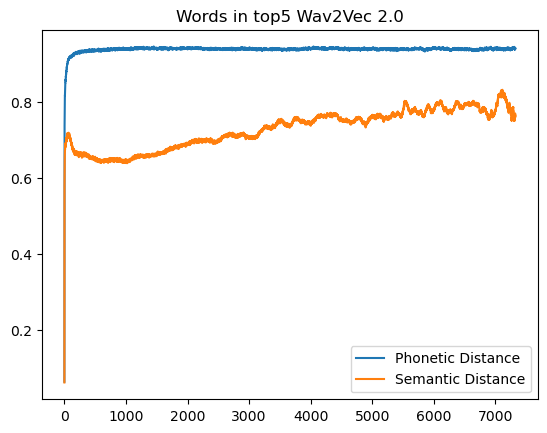

In [ ]:
plt.plot(ph_d_mean, label='Phonetic Distance')
plt.plot(sem_d_mean, label='Semantic Distance')
plt.title('Words in top5 Wav2Vec 2.0')
plt.legend()

## Las que no entraron en top5

In [ ]:
sem_d = []
ph_d = []
for i in tqdm(range(len(words_w2v_nottop_5))):
    index, word = words_w2v_nottop_5[i]
    unique_words = unique_ordered([words['keys_anchors'][di] for di in w2vbert['retrieval_indices'][index]])
    si = [semantic_distance(word, word_ret, glove_matrix) for word_ret in unique_words]
    pi = [phonetic_distance(word, word_ret, lexicon) for word_ret in unique_words]
    sem_d.append(si)
    ph_d.append(pi)

sem_d = np.array(sem_d)
ph_d = np.array(ph_d)
ph_d_mean = ph_d.mean(axis=0)
sem_d_mean = sem_d.mean(axis=0)    

100%|██████████| 1365/1365 [00:34<00:00, 39.36it/s]


In [ ]:
ph_d_tensors = [torch.tensor(d) for d in ph_d]
ph_d_tensor = torch.stack(ph_d_tensors)

k = 20
top_values_list = []
top_indices_list = []
for i in range(len(ph_d_tensor)):
    values, indices = torch.topk(ph_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices_ph = torch.cat(top_indices_list)
all_top_indices_ph = all_top_indices_ph.float()

print(f'promedio fonetico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices_ph)}')

promedio fonetico: 0.424983948469162 en ranking 2108.173095703125


In [ ]:
sem_d_tensors = [torch.tensor(d) for d in sem_d]
sem_d_tensor = torch.stack(sem_d_tensors)

k = 20
top_values_list = []
top_indices_list = []
for i in range(len(sem_d_tensor)):
    values, indices = torch.topk(sem_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices_sem = torch.cat(top_indices_list)
all_top_indices_sem = all_top_indices_sem.float()

print(f'promedio semantico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices_sem)}')

promedio semantico: 0.46769946813583374 en ranking 2505.23193359375


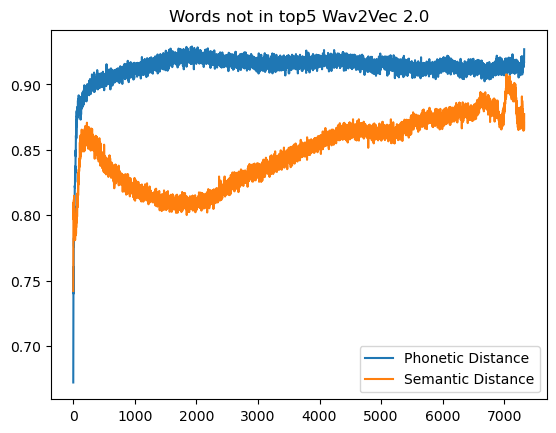

In [ ]:
plt.plot(ph_d_mean, label='Phonetic Distance')
plt.plot(sem_d_mean, label='Semantic Distance')
plt.title('Words not in top5 Wav2Vec 2.0')
plt.legend()

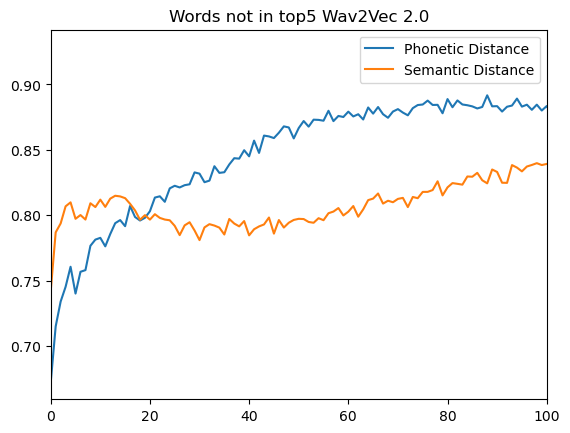

In [ ]:
plt.plot(ph_d_mean, label='Phonetic Distance')
plt.plot(sem_d_mean, label='Semantic Distance')
plt.title('Words not in top5 Wav2Vec 2.0')
plt.xlim(0,100)
plt.legend()

# EncodecMAE

In [ ]:
with open('../../experiments/retrieval_phonetic_vs_semantic_ecmelbert.json', 'r') as f:
    ecmelbert = json.load(f)

In [ ]:
total = len(keys_test)
words_ec_nottop_5 = []
words_ec_top_5 = []
count = 0
for i in range(total):
    word = keys_test[i]
    unique_words = unique_ordered([words['keys_anchors'][index] for index in ecmelbert['retrieval_indices'][i]])
    if not word in unique_words[:5]:
        words_ec_nottop_5.append([i,word])
    else:
        words_ec_top_5.append([i,word])

## Las que entraron en el top 5

In [ ]:
sem_d = []
ph_d = []
for i in tqdm(range(len(words_ec_top_5))):
    index, word = words_ec_top_5[i]
    unique_words = unique_ordered([words['keys_anchors'][di] for di in ecmelbert['retrieval_indices'][index]])
    si = [semantic_distance(word, word_ret, glove_matrix) for word_ret in unique_words]
    pi = [phonetic_distance(word, word_ret, lexicon) for word_ret in unique_words]
    sem_d.append(si)
    ph_d.append(pi)

sem_d = np.array(sem_d)
ph_d = np.array(ph_d)
ph_d_mean = ph_d.mean(axis=0)
sem_d_mean = sem_d.mean(axis=0)  

100%|██████████| 4908/4908 [01:55<00:00, 42.41it/s]


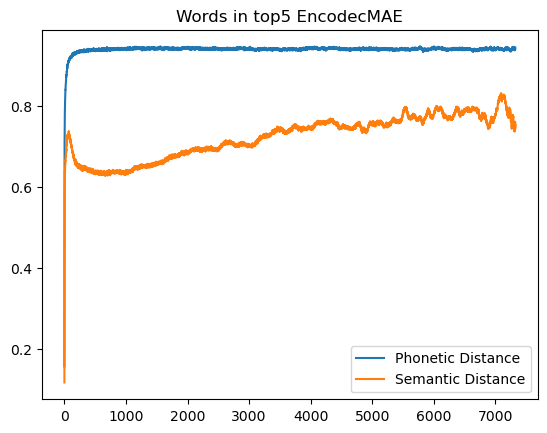

In [ ]:
plt.plot(ph_d_mean, label='Phonetic Distance')
plt.plot(sem_d_mean, label='Semantic Distance')
plt.title('Words in top5 EncodecMAE')
plt.legend()

In [ ]:
ph_d_tensors = [torch.tensor(d) for d in ph_d]
ph_d_tensor = torch.stack(ph_d_tensors)

k = 50
top_values_list = []
top_indices_list = []
for i in range(len(ph_d_tensor)):
    values, indices = torch.topk(ph_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices_ph = torch.cat(top_indices_list)
all_top_indices_ph = all_top_indices_ph.float()

print(f'promedio fonetico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices_ph)}')

promedio fonetico: 0.5075435638427734 en ranking 2115.322021484375


In [ ]:
sem_d_tensors = [torch.tensor(d) for d in sem_d]
sem_d_tensor = torch.stack(sem_d_tensors)

k = 50
top_values_list = []
top_indices_list = []
for i in range(len(sem_d_tensor)):
    values, indices = torch.topk(sem_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices_sem = torch.cat(top_indices_list)
all_top_indices_sem = all_top_indices_sem.float()

print(f'promedio semantico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices_sem)}')

promedio semantico: 0.30119478702545166 en ranking 971.3150024414062


(array([93957., 49758., 31125., 20042., 13872., 10033.,  6354.,  4285.,
         2748.,  2258.,  1546.,  1226.,  1201.,  1343.,   995.,  1182.,
         1068.,   671.,  1112.,   624.]),
 array([   0.        ,  366.20001221,  732.40002441, 1098.59997559,
        1464.80004883, 1831.        , 2197.19995117, 2563.39990234,
        2929.60009766, 3295.80004883, 3662.        , 4028.19995117,
        4394.39990234, 4760.60009766, 5126.79980469, 5493.        ,
        5859.20019531, 6225.39990234, 6591.60009766, 6957.79980469,
        7324.        ]),
 <BarContainer object of 20 artists>)

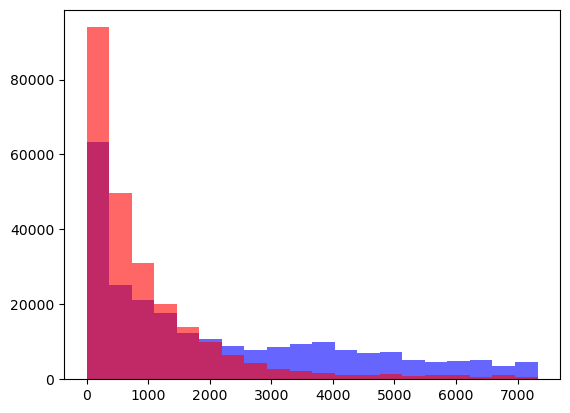

In [ ]:
plt.hist(all_top_indices_ph, bins=20, color='blue', alpha=0.6, label='sem_d[1200]')
plt.hist(all_top_indices_sem, bins=20, color='red', alpha=0.6, label='sem_d[1200]')

## Las que no entraron en el top5

In [ ]:
sem_d = []
ph_d = []

for i in tqdm(range(len(words_ec_nottop_5))):
    index, word = words_ec_nottop_5[i]
    unique_words = unique_ordered([words['keys_anchors'][di] for di in ecmelbert['retrieval_indices'][index]])
    si = [semantic_distance(word, word_ret, glove_matrix) for word_ret in unique_words]
    pi = [phonetic_distance(word, word_ret, lexicon) for word_ret in unique_words]
    sem_d.append(si)
    ph_d.append(pi)

sem_d = np.array(sem_d)
ph_d = np.array(ph_d)
ph_d_mean = ph_d.mean(axis=0)
sem_d_mean = sem_d.mean(axis=0)  

100%|██████████| 2127/2127 [00:50<00:00, 41.74it/s]


In [ ]:
plt.plot(ph_d_mean, label='Phonetic Distance')
plt.plot(sem_d_mean, label='Semantic Distance')
plt.title('Words not in top5 EncodecMAE')
plt.legend()

In [ ]:
plt.plot(ph_d_mean, label='Phonetic Distance')
plt.plot(sem_d_mean, label='Semantic Distance')
plt.title('Words not in top5 EncodecMAE')
plt.xlim(0,20)
plt.legend()

In [ ]:
ph_d_tensors = [torch.tensor(d) for d in ph_d]
ph_d_tensor = torch.stack(ph_d_tensors)

k = 20
top_values_list = []
top_indices_list = []
for i in range(len(ph_d_tensor)):
    values, indices = torch.topk(ph_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices = torch.cat(top_indices_list)
all_top_indices = all_top_indices.float()

print(f'promedio fonetico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices)}')

promedio fonetico: 0.4185952842235565 en ranking 2096.373779296875


In [ ]:
sem_d_tensors = [torch.tensor(d) for d in sem_d]
sem_d_tensor = torch.stack(sem_d_tensors)

k = 20
top_values_list = []
top_indices_list = []
for i in range(len(sem_d_tensor)):
    values, indices = torch.topk(sem_d_tensor[i], k=k, largest=False)
    top_values_list.append(values)
    top_indices_list.append(indices)

all_top_values = torch.cat(top_values_list)  # Concatena todos los tensores en uno solo
all_top_values = all_top_values.float()

all_top_indices = torch.cat(top_indices_list)
all_top_indices = all_top_indices.float()

print(f'promedio semantico: {torch.mean(all_top_values)} en ranking {torch.mean(all_top_indices)}')

promedio semantico: 0.4136130213737488 en ranking 2200.790283203125
